<a href="https://colab.research.google.com/github/heehyeong/datamining_ecomerce/blob/main/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 모듈 불러오기

In [ ]:
# Install the SHAP package
!pip install shap

# Data manipulation library
import numpy as np
import pandas as pd

# Data visualization library
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Statistics
import scipy.stats as st
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 29.7 MB/s eta 0:00:00


## 데이터 탐색

1. 데이터 불러오기

In [ ]:
file_path = '/content/Train.csv'
data = pd.read_csv(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
df = data

In [ ]:
df=df.drop(columns=['ID'])

2. 시각화

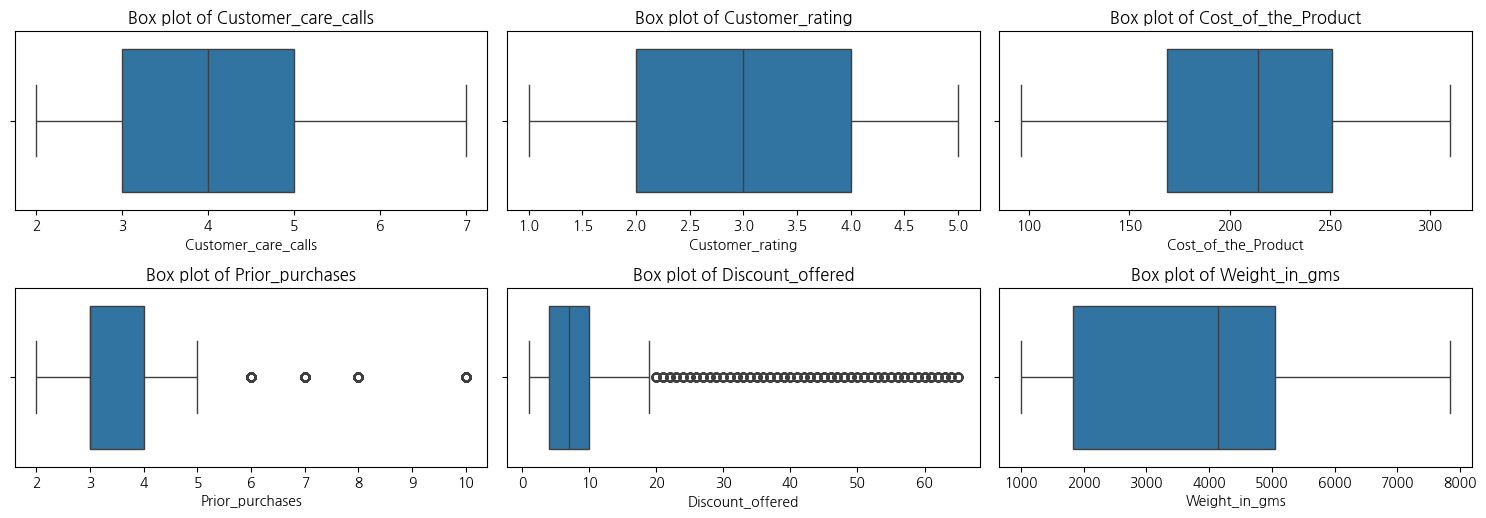

In [ ]:
# 숫자형 독립 변수만 선택
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.drop(['Reached.on.Time_Y.N'])

# 각 숫자형 독립 변수에 대해 Box plot 그리기
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 3, i)  # 적절한 subplot 배치 설정
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
# 기초통계량 계산
statistics = df[numeric_features].describe()

# 기초통계량 출력
statistics

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


In [ ]:
#범주형 독립 변수만 선택
cat_cols = []
for col in df.columns:
    if df[col].dtypes == "object":
        cat_cols.append(col)
cat_cols

#정보 확인
for col in cat_cols:
    print(f"{col} data has :", df[col].unique())
    print(df[col].value_counts(), "\n")

Warehouse_block data has : ['D' 'F' 'A' 'B' 'C']
Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64 

Mode_of_Shipment data has : ['Flight' 'Ship' 'Road']
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64 

Product_importance data has : ['low' 'medium' 'high']
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64 

Gender data has : ['F' 'M']
Gender
F    5545
M    5454
Name: count, dtype: int64 



3. 범주형 변수 바꿔주기

In [ ]:
# F = 1, M = 0
#df['Gender'] = (df['Gender'] == 'F').astype(int)

In [ ]:
# 0 = low, 1 = medium, 2 = high
#df.loc[df['Product_importance'] == 'low', 'Product_importance'] = 0
#df.loc[df['Product_importance'] == 'medium', 'Product_importance'] = 1
#df.loc[df['Product_importance'] == 'high', 'Product_importance'] = 2

In [ ]:
# 0 = Flight, 1 = Road, 2 = Ship
#df['Mode_of_Shipment'] = df['Mode_of_Shipment'].astype('category')
#df['Mode_of_Shipment'] = df['Mode_of_Shipment'].cat.codes

In [ ]:
# 3 = D, 4 = F, 0 = A, 1 = B, C = 2
#df['Warehouse_block'] = df['Warehouse_block'].astype('category')
#df['Warehouse_block'] = df['Warehouse_block'].cat.codes

In [ ]:
# 범주형 데이터 원핫 인코딩
# Encode categorical variables using one-hot encoding
data_enc = pd.get_dummies(df, columns=['Warehouse_block', 'Gender', 'Product_importance', 'Mode_of_Shipment'])

# Convert boolean columns to integer if necessary
for column in data_enc.columns:
    if data_enc[column].dtype == 'bool':
        data_enc[column] = data_enc[column].astype(int)

data_enc.info()
data_enc.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Customer_care_calls        10999 non-null  int64
 1   Customer_rating            10999 non-null  int64
 2   Cost_of_the_Product        10999 non-null  int64
 3   Prior_purchases            10999 non-null  int64
 4   Discount_offered           10999 non-null  int64
 5   Weight_in_gms              10999 non-null  int64
 6   Reached.on.Time_Y.N        10999 non-null  int64
 7   Warehouse_block_A          10999 non-null  int64
 8   Warehouse_block_B          10999 non-null  int64
 9   Warehouse_block_C          10999 non-null  int64
 10  Warehouse_block_D          10999 non-null  int64
 11  Warehouse_block_F          10999 non-null  int64
 12  Gender_F                   10999 non-null  int64
 13  Gender_M                   10999 non-null  int64
 14  Product_importance_hig

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Gender_F,Gender_M,Product_importance_high,Product_importance_low,Product_importance_medium,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,4,2,177,3,44,1233,1,0,0,0,1,0,1,0,0,1,0,1,0,0
1,4,5,216,2,59,3088,1,0,0,0,0,1,0,1,0,1,0,1,0,0
2,2,2,183,4,48,3374,1,1,0,0,0,0,0,1,0,1,0,1,0,0


- 상관계수 확인

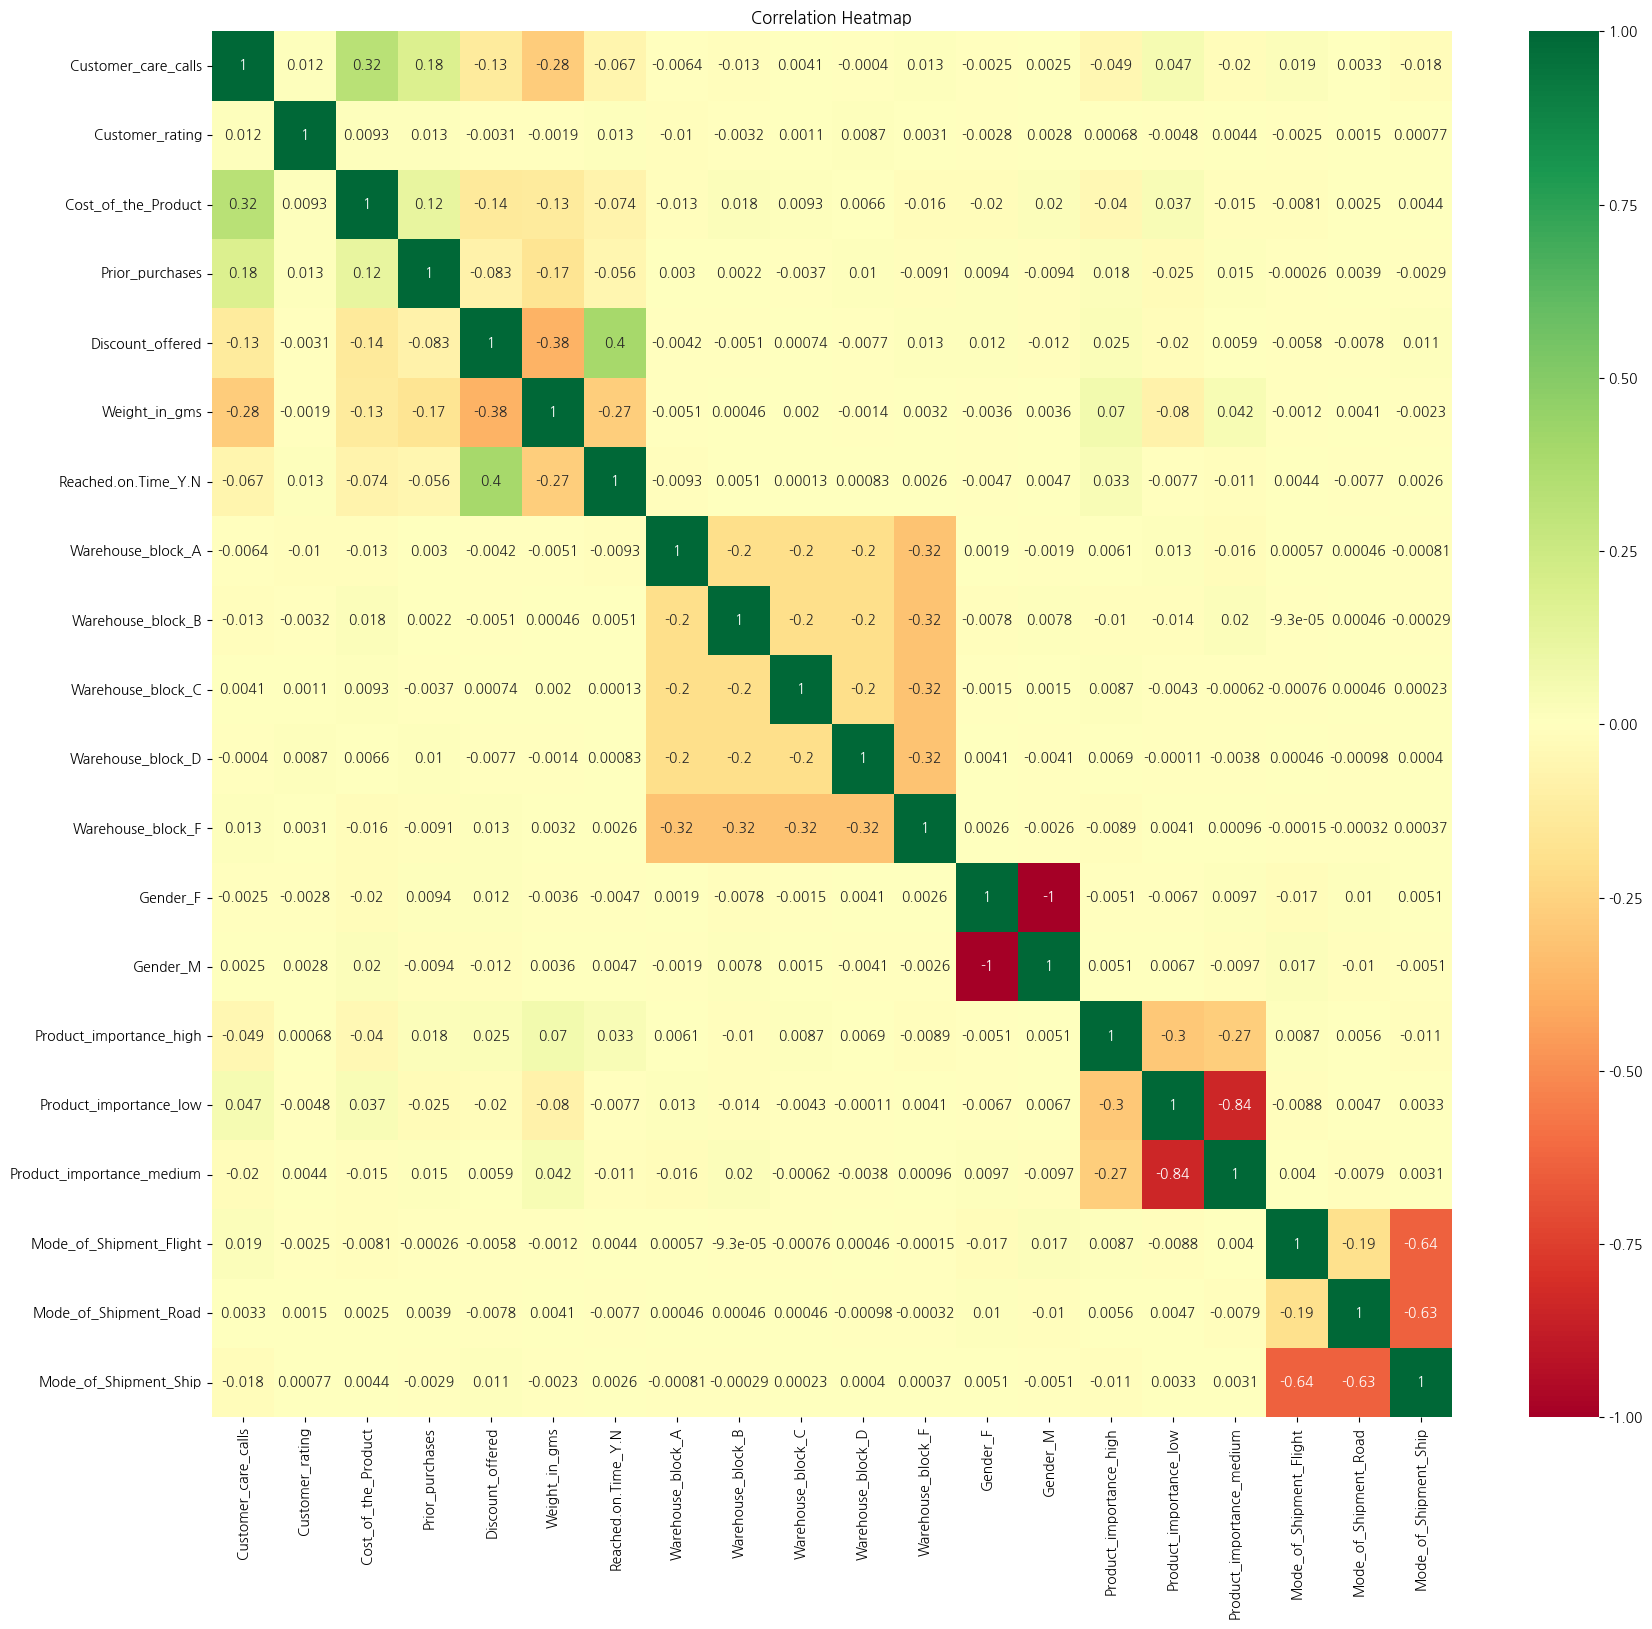

In [ ]:
df_corr = data_enc.corr()
df_corr["Reached.on.Time_Y.N"].sort_values(ascending = False)

# Correlation heatmap
correlation = data_enc.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation, annot=True, cmap="RdYlGn")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 3. 원핫인코딩 및 스케일링
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

categorical_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
numeric_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)])

In [ ]:
#타겟 변수 자리 이동
column_to_move = 'Reached.on.Time_Y.N'
column = data_enc.pop(column_to_move)
data_enc[column.name] = column

- 정규화

In [ ]:
columns_to_normalize = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
scaler = StandardScaler()
df_normalized = data_enc.copy()
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

In [ ]:
df_normalized

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Gender_F,Gender_M,Product_importance_high,Product_importance_low,Product_importance_medium,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Reached.on.Time_Y.N
0,-0.047711,-0.700755,-0.690722,-0.372735,1.889983,-1.468240,0,0,0,1,0,1,0,0,1,0,1,0,0,1
1,-0.047711,1.421578,0.120746,-1.029424,2.815636,-0.333893,0,0,0,0,1,0,1,0,1,0,1,0,0,1
2,-1.799887,-0.700755,-0.565881,0.283954,2.136824,-0.159002,1,0,0,0,0,0,1,0,1,0,1,0,0,1
3,-0.923799,0.006689,-0.711529,0.283954,-0.208162,-1.502484,0,1,0,0,0,0,1,0,0,1,1,0,0,1
4,-1.799887,-0.700755,-0.545074,-0.372735,2.013404,-0.703244,0,0,1,0,0,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,-0.047711,-1.408199,0.869792,0.940643,-0.763553,-1.281730,1,0,0,0,0,1,0,0,0,1,0,0,1,1
10995,-0.047711,-1.408199,0.453655,0.940643,-0.455002,-1.459679,0,1,0,0,0,1,0,0,0,1,0,0,1,0
10996,0.828377,0.714133,0.661724,0.940643,-0.578423,-1.515937,0,0,1,0,0,1,0,0,1,0,0,0,1,0
10997,0.828377,-0.700755,0.266394,1.597332,-0.701843,-1.482304,0,0,0,0,1,0,1,0,0,1,0,0,1,0


In [ ]:
df_normalized = df_normalized[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product','Prior_purchases', 'Discount_offered', 'Weight_in_gms','Reached.on.Time_Y.N']]

In [ ]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_care_calls  10999 non-null  float64
 1   Customer_rating      10999 non-null  float64
 2   Cost_of_the_Product  10999 non-null  float64
 3   Prior_purchases      10999 non-null  float64
 4   Discount_offered     10999 non-null  float64
 5   Weight_in_gms        10999 non-null  float64
 6   Reached.on.Time_Y.N  10999 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 601.6 KB


df_

## 모델 적용

### (1) 데이터 준비

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Separate features and target variable
X = df_normalized[df_normalized.columns[:-1]].values
y = df_normalized[df_normalized.columns[-1]].values

# First, split the data into training and temp sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply oversampling to the training data only
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Split the temp set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Now X_train_resampled, y_train_resampled are the oversampled training sets
# and X_val, X_test, y_val, y_test are the validation and test sets

In [ ]:
df_normalized

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Gender_F,Gender_M,Product_importance_high,Product_importance_low,Product_importance_medium,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Reached.on.Time_Y.N
0,-0.047711,-0.700755,-0.690722,-0.372735,1.889983,-1.468240,0,0,0,1,0,1,0,0,1,0,1,0,0,1
1,-0.047711,1.421578,0.120746,-1.029424,2.815636,-0.333893,0,0,0,0,1,0,1,0,1,0,1,0,0,1
2,-1.799887,-0.700755,-0.565881,0.283954,2.136824,-0.159002,1,0,0,0,0,0,1,0,1,0,1,0,0,1
3,-0.923799,0.006689,-0.711529,0.283954,-0.208162,-1.502484,0,1,0,0,0,0,1,0,0,1,1,0,0,1
4,-1.799887,-0.700755,-0.545074,-0.372735,2.013404,-0.703244,0,0,1,0,0,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,-0.047711,-1.408199,0.869792,0.940643,-0.763553,-1.281730,1,0,0,0,0,1,0,0,0,1,0,0,1,1
10995,-0.047711,-1.408199,0.453655,0.940643,-0.455002,-1.459679,0,1,0,0,0,1,0,0,0,1,0,0,1,0
10996,0.828377,0.714133,0.661724,0.940643,-0.578423,-1.515937,0,0,1,0,0,1,0,0,1,0,0,0,1,0
10997,0.828377,-0.700755,0.266394,1.597332,-0.701843,-1.482304,0,0,0,0,1,0,1,0,0,1,0,0,1,0


- 데이터 준비 (gpt ver.)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# 오버샘플링 후 클래스 분포 확인
print("\n오버샘플링 후 클래스 분포:")
print(y_train_resampled.value_counts())

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# 오버샘플링 전 클래스 분포
y.value_counts().plot(kind='bar', ax=axes[0], title='오버샘플링 전 클래스 분포')
axes[0].set_xlabel('Reached on Time')
axes[0].set_ylabel('Count')

# 오버샘플링 후 클래스 분포
y_train_resampled.value_counts().plot(kind='bar', ax=axes[1], title='오버샘플링 후 클래스 분포')
axes[1].set_xlabel('Reached on Time')

plt.show()


오버샘플링 후 클래스 분포:


AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

### (2) 모델 평가

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def evaluate(y_test, y_pred):
    print(f"Accuracy : {accuracy_score(y_test, y_pred)}")
    print(f"ROC AUC  : {roc_auc_score(y_test, y_pred)}")

    plt.figure(figsize=(20,5));

    cf_matrix = confusion_matrix(y_test, y_pred)

    plt.subplot(1, 2, 1)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')
    plt.ylabel('Actuals')
    plt.xlabel('Predictions')
    #plt.show()

    plt.subplot(1, 2, 2)
    fpr, tpr, thresholds = roc_curve(y_test , y_pred)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

### 1. KNN

Accuracy : 0.6409090909090909
ROC AUC  : 0.6401515151515151


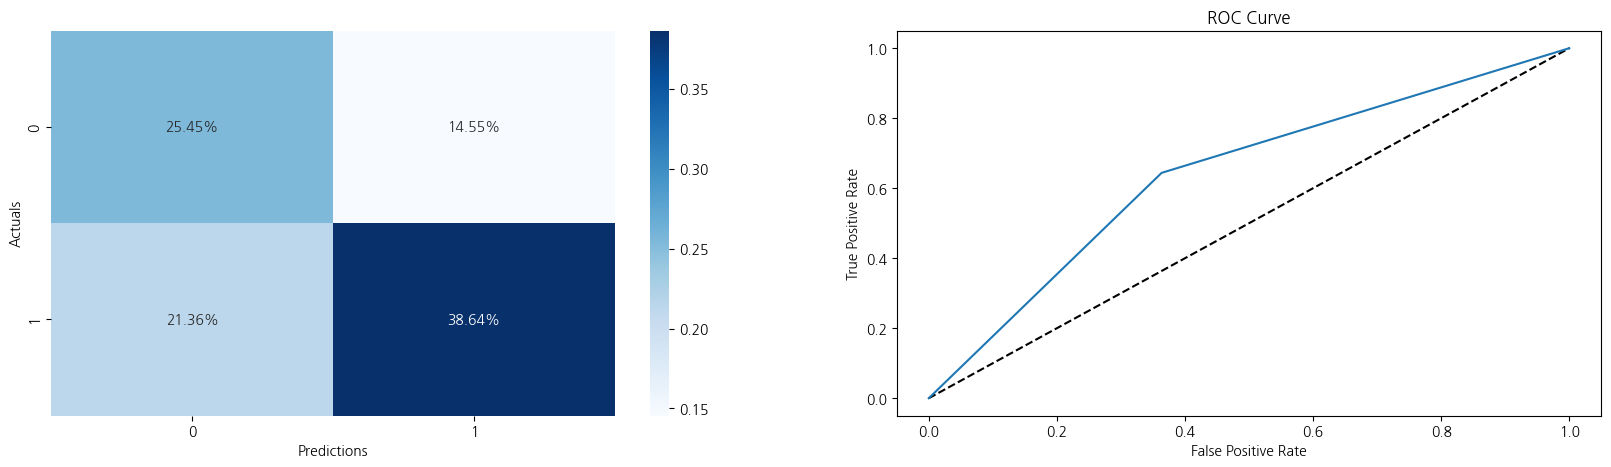

Accuracy: 0.6409090909090909
Precision: 0.7264957264957265
Recall: 0.6439393939393939
F1-score: 0.6827309236947792


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3 ,metric= 'euclidean', weights='distance')
knn_model.fit(X_train_resampled, y_train_resampled)

y_prediction_knn = knn_model.predict(X_test)
evaluate(y_test, y_prediction_knn)

In [ ]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Try different values of k
    'weights': ['uniform', 'distance'],  # Different weightings of neighbors
    'metric': ['euclidean', 'manhattan']  # Different distance metrics
}

# Instantiate the grid search
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy score: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Accuracy on test set: {:.2f}".format(test_accuracy))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation accuracy score: 0.73
Accuracy on test set: 0.64


### 2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier# 모델 학습
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# 예측
y_pred_dt = clf.predict(X_test)

# 평가
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_dt))

Confusion Matrix:
[[ 96  80]
 [ 76 188]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.55      0.55       176
           1       0.70      0.71      0.71       264

    accuracy                           0.65       440
   macro avg       0.63      0.63      0.63       440
weighted avg       0.64      0.65      0.64       440


Accuracy Score:
0.6454545454545455


Accuracy : 0.6454545454545455
ROC AUC  : 0.6287878787878788


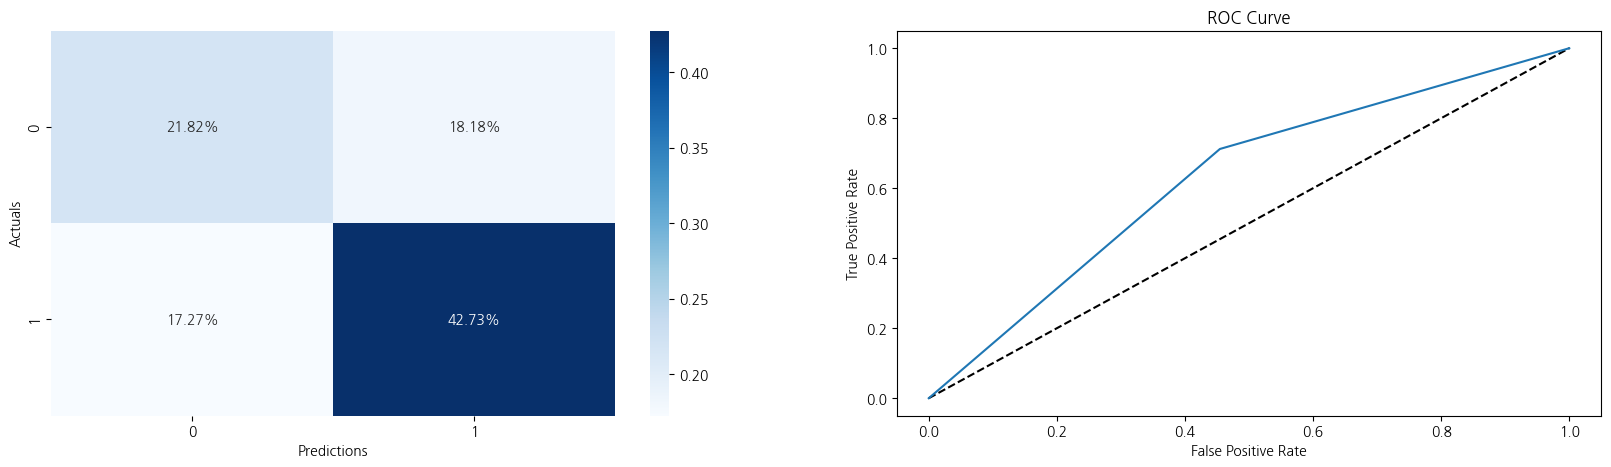

Accuracy: 0.6454545454545455
Precision: 0.7014925373134329
Recall: 0.7121212121212122
F1-score: 0.7067669172932332


In [ ]:
evaluate(y_test, y_pred_dt)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# 하이퍼 파라미터 튜닝
param_grid = {'max_depth': [None, 3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': None, 'min_samples_split': 2}
Best cross-validation score: 0.74


Accuracy : 0.6454545454545455
ROC AUC  : 0.6287878787878788


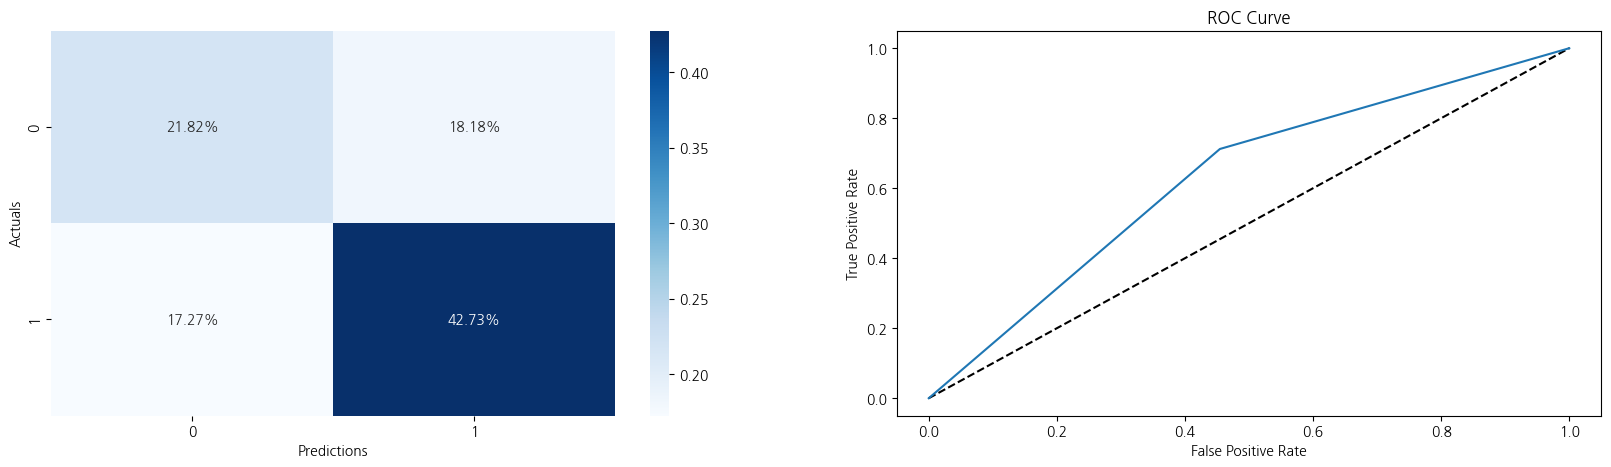

Accuracy: 0.6454545454545455
Precision: 0.7014925373134329
Recall: 0.7121212121212122
F1-score: 0.7067669172932332


In [ ]:
from sklearn.tree import DecisionTreeClassifier# 모델 학습
clf = DecisionTreeClassifier(random_state=42, max_depth=None, min_samples_split = 2)
clf.fit(X_train_resampled, y_train_resampled)

# 예측
y_pred_dt = clf.predict(X_test)

#평가
evaluate(y_test, y_pred_dt)

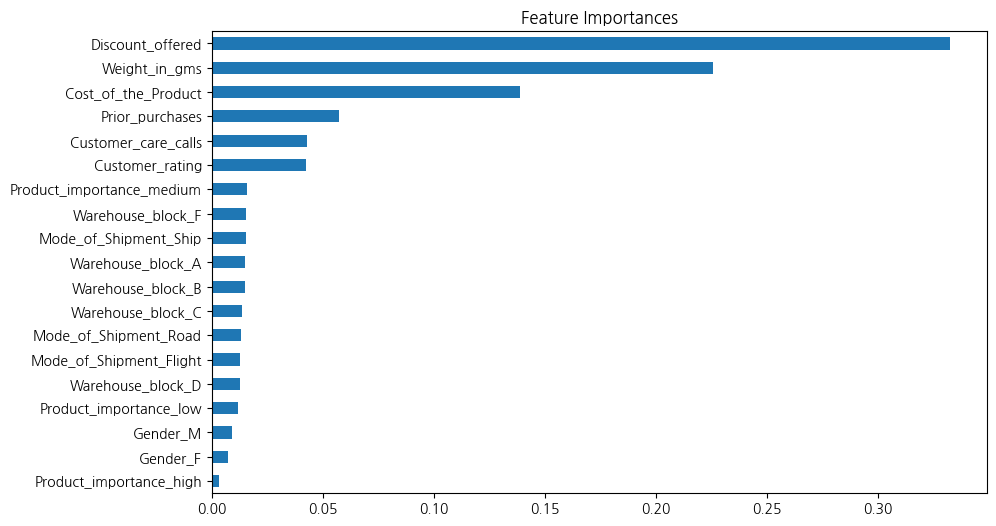

In [ ]:
# 특성 중요도 시각화
feature_importances = pd.Series(clf.feature_importances_, index=data_enc.drop(columns = ['Reached.on.Time_Y.N']).columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()

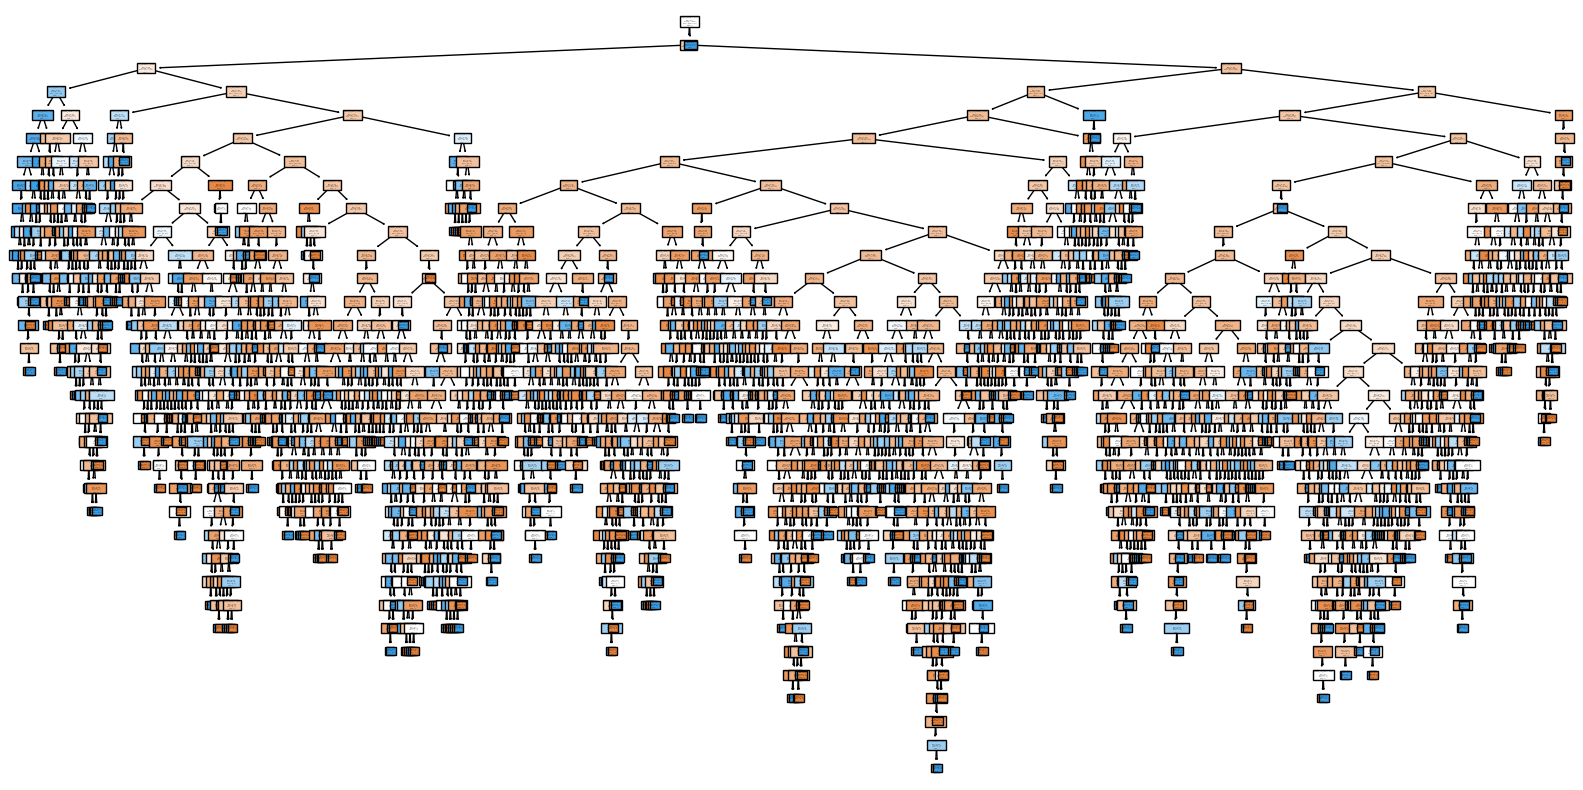

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

features = data_enc.columns.drop(['Reached.on.Time_Y.N'])
features

# Decision Tree 시각화
plt.figure(figsize=(20,10))
plot_tree(grid_search.best_estimator_, filled=True, feature_names=features, class_names=['0','1'])
plt.show()

### 4. SVM

Accuracy : 0.6613636363636364
ROC AUC  : 0.7168560606060607


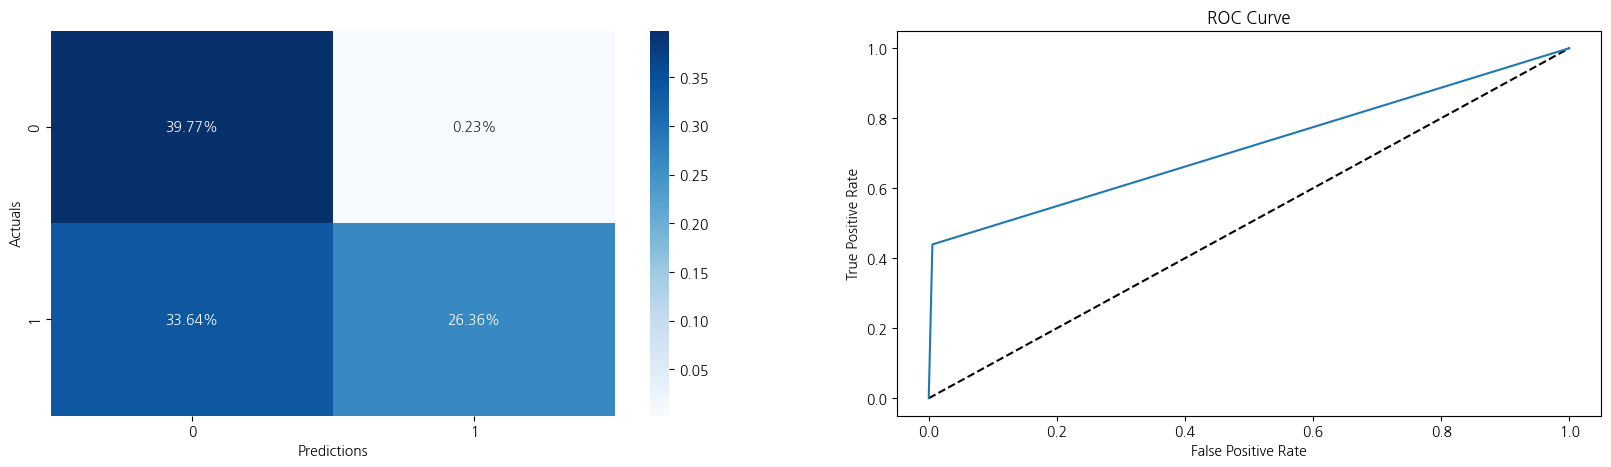

Accuracy: 0.6613636363636364
Precision: 0.9914529914529915
Recall: 0.4393939393939394
F1-score: 0.6089238845144357


In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model = svm_model.fit(X_train_resampled, y_train_resampled)

y_prediction_svm = svm_model.predict(X_test)
evaluate(y_test, y_prediction_svm)

In [ ]:
print(svm_model.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


### 로지스틱 회귀모델

Accuracy: 0.6613636363636364


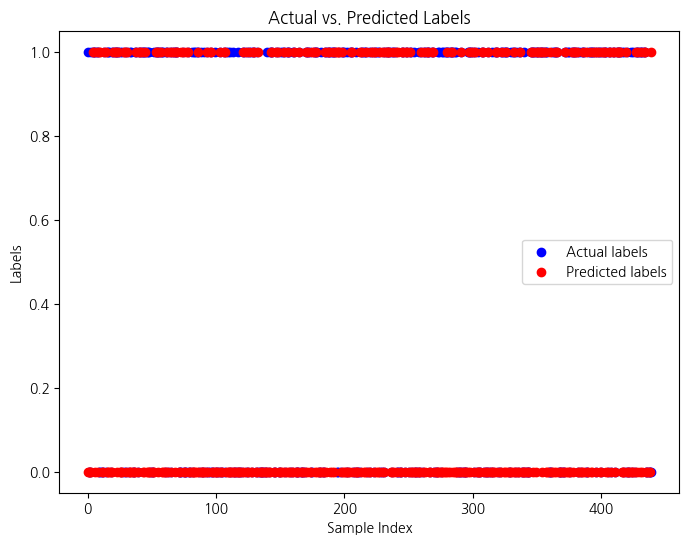

Accuracy : 0.6613636363636364
ROC AUC  : 0.6988636363636364


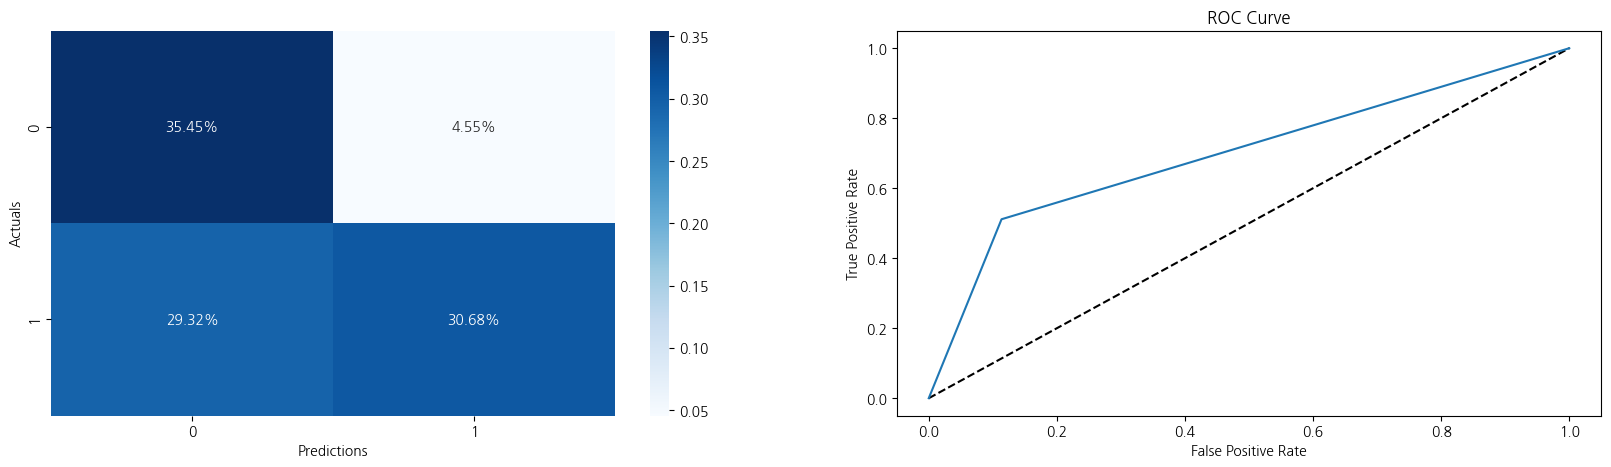

Accuracy: 0.6613636363636364
Precision: 0.8709677419354839
Recall: 0.5113636363636364
F1-score: 0.6443914081145584


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# 테스트 데이터에 대한 예측 수행
y_pred_lr = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

# 예측 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual labels')
plt.scatter(range(len(y_pred_lr)), y_pred_lr, color='red', label='Predicted labels')
plt.xlabel('Sample Index')
plt.ylabel('Labels')
plt.title('Actual vs. Predicted Labels')
plt.legend()
plt.show()

evaluate(y_test, y_pred_lr)

Best Threshold: 0.17
Precision: 0.87
Recall: 0.51
F1 Score: 0.64


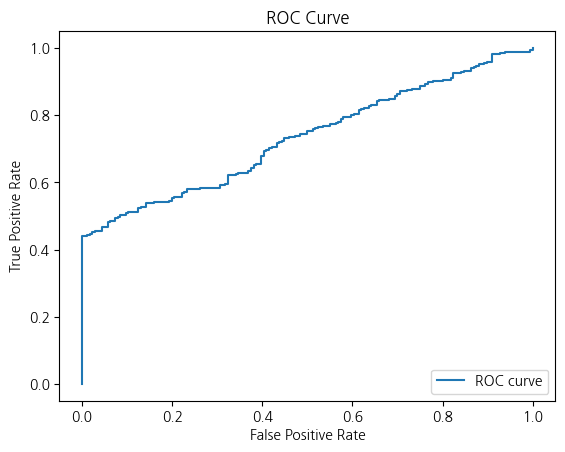

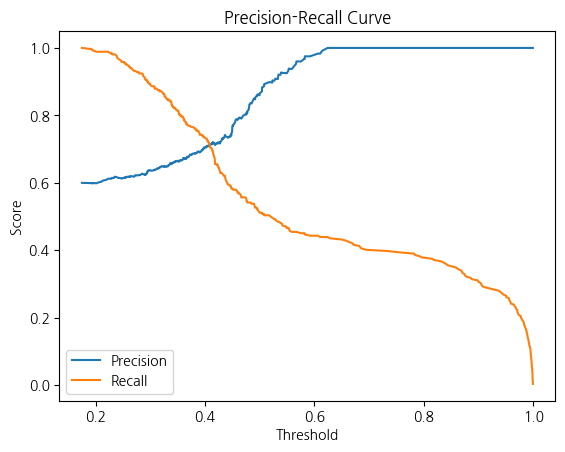

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, f1_score, precision_score, recall_score

# 확률 예측
y_probs = model.predict_proba(X_test)[:, 1]

# 임계값에 따른 Precision-Recall 곡선
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# F1 Score 계산
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# 최적의 임계값 찾기 (F1 Score가 최대가 되는 임계값)
best_threshold = thresholds[np.argmax(recalls)]
print(f"Best Threshold: {best_threshold:.2f}")

# 임계값을 사용하여 최종 예측
y_pred = (y_probs >= best_threshold).astype(int)

# 성능 평가
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# ROC Curve 그리기
fpr, tpr, roc_thresholds = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve 그리기
plt.figure()
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.show()

### 나이브 베이즈 모델

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train_resampled, y_train_resampled)

y_prediction_nb = nb_model.predict(X_test)

Accuracy : 0.6454545454545455
ROC AUC  : 0.7017045454545454


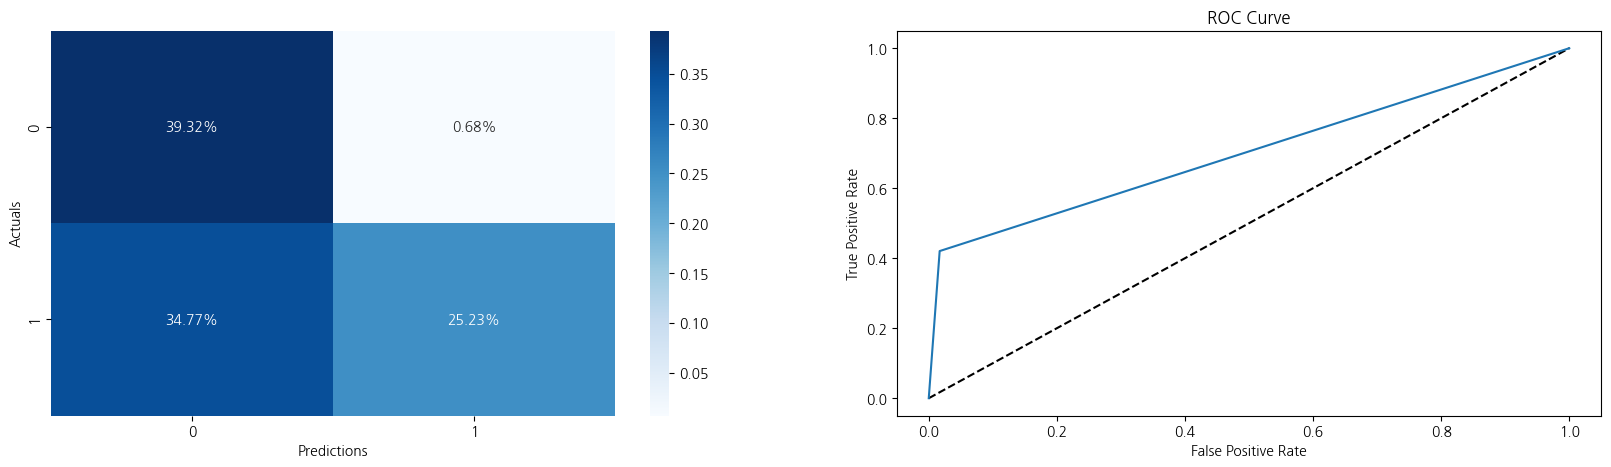

Accuracy: 0.6454545454545455
Precision: 0.9736842105263158
Recall: 0.42045454545454547
F1-score: 0.5873015873015873


In [ ]:
evaluate(y_test, y_prediction_nb)

### **Neural Network**

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
def plot_loss(history):
  fig, (ax1, ax2) = plt.subplots(1,2)
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)
  plt.show()

In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

def train_nn_model(X_train, y_train, input_dim, validation_split, learning_rate, batch_size, epochs, X_val, y_val):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))  # Ensure the input shape is specified correctly
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Adjust based on your problem (e.g., regression, classification)

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=validation_split)

    return model, history

Epoch 1/200
165/165 [==============================] - 2s 6ms/step - loss: 0.5783 - accuracy: 0.6740 - val_loss: 0.5636 - val_accuracy: 0.6562
Epoch 2/200
165/165 [==============================] - 1s 4ms/step - loss: 0.5404 - accuracy: 0.6964 - val_loss: 0.5518 - val_accuracy: 0.6619
Epoch 3/200
165/165 [==============================] - 1s 5ms/step - loss: 0.5329 - accuracy: 0.7043 - val_loss: 0.5417 - val_accuracy: 0.6687
Epoch 4/200
165/165 [==============================] - 1s 4ms/step - loss: 0.5280 - accuracy: 0.7096 - val_loss: 0.5443 - val_accuracy: 0.6699
Epoch 5/200
165/165 [==============================] - 1s 5ms/step - loss: 0.5244 - accuracy: 0.7133 - val_loss: 0.5271 - val_accuracy: 0.6608
Epoch 6/200
165/165 [==============================] - 1s 4ms/step - loss: 0.5223 - accuracy: 0.7140 - val_loss: 0.5320 - val_accuracy: 0.6710
Epoch 7/200
165/165 [==============================] - 0s 3ms/step - loss: 0.5205 - accuracy: 0.7141 - val_loss: 0.5390 - val_accuracy: 0.6722

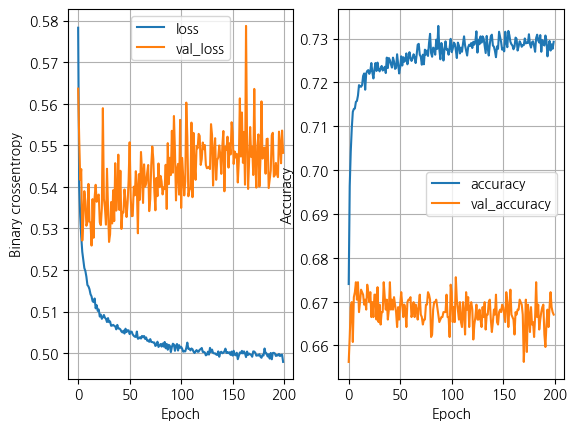

In [ ]:
# Ensure the data types are correct
X_train_resampled = X_train_resampled.astype(np.float32)
y_train_resampled = y_train_resampled.astype(np.float32)  # Or np.int32 if it's a classification problem
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)  # Or np.int32 if it's a classification problem

input_dim = X_train_resampled.shape[1]  # Set input_dim to the number of features in X_train_resampled

model, history = train_nn_model(X_train_resampled, y_train_resampled, input_dim, 0.2, 0.005, 64, 200, X_val, y_val)
plot_loss(history)

In [ ]:
evaluate

### **Random Forest**

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
y_prediction_rf = rf.predict(X_test)
print(classification_report(y_test, y_prediction_rf))

              precision    recall  f1-score   support

           0       0.54      0.73      0.62       176
           1       0.77      0.59      0.67       264

    accuracy                           0.65       440
   macro avg       0.66      0.66      0.65       440
weighted avg       0.68      0.65      0.65       440



Accuracy : 0.6477272727272727
ROC AUC  : 0.6609848484848485


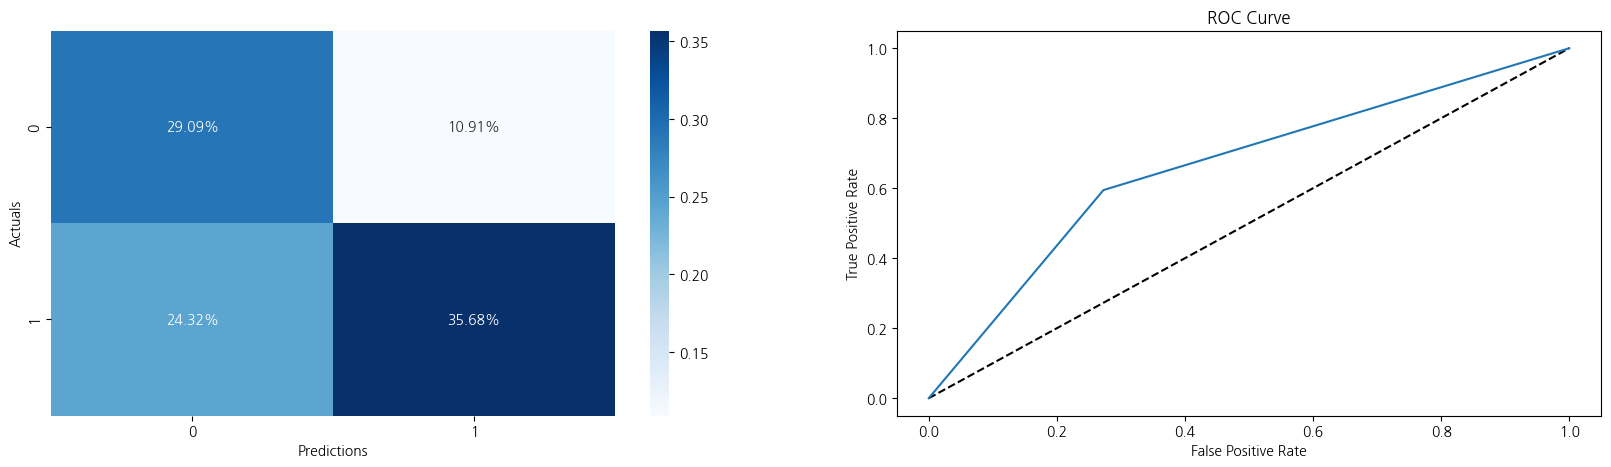

Accuracy: 0.6477272727272727
Precision: 0.7658536585365854
Recall: 0.5946969696969697
F1-score: 0.6695095948827292


In [ ]:
evaluate(y_test, y_prediction_rf)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
param = {'n_estimators' : randint(50,500)}

rand_search = RandomizedSearchCV(rf, param_distributions = param, n_iter = 5, cv = 5)

rand_search.fit(X_train_resampled, y_train_resampled)

best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'n_estimators': 397}


Accuracy : 0.65
ROC AUC  : 0.6638257575757576


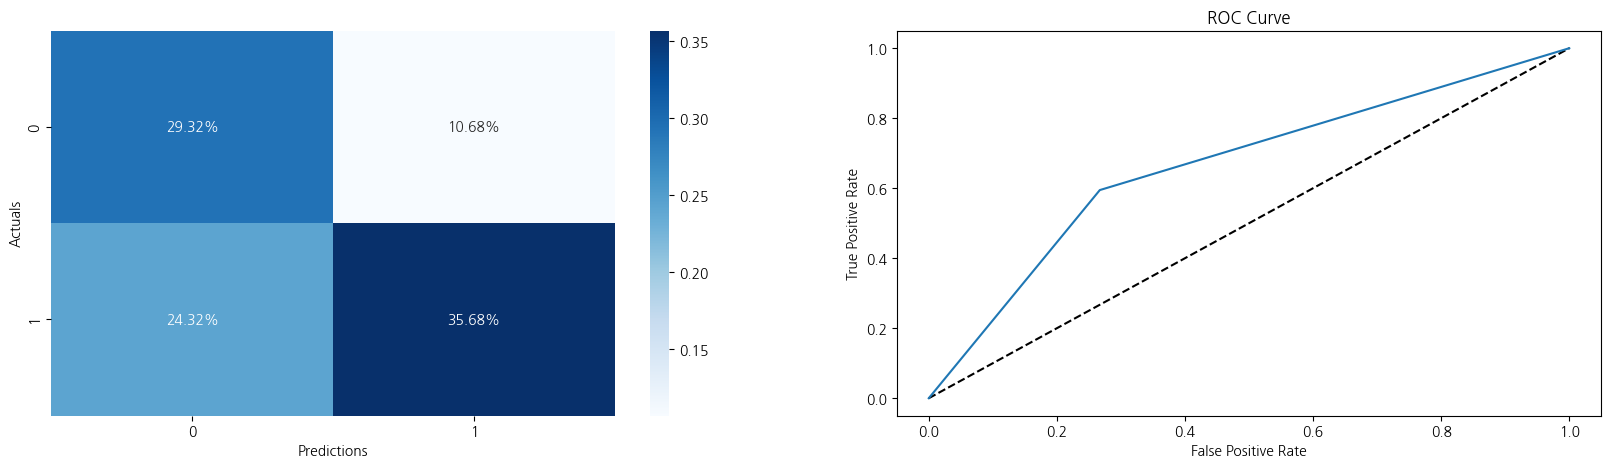

Accuracy: 0.65
Precision: 0.7696078431372549
Recall: 0.5946969696969697
F1-score: 0.670940170940171


In [ ]:
best_rf = RandomForestClassifier(n_estimators=397, random_state=42)
best_rf.fit(X_train_resampled, y_train_resampled)

y_best_prediction_rf = best_rf.predict(X_test)
evaluate(y_test, y_best_prediction_rf)

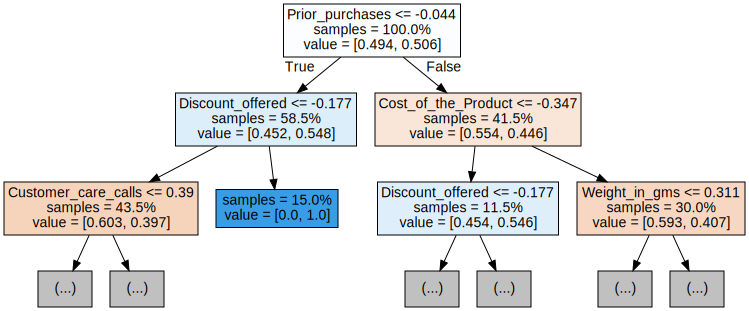

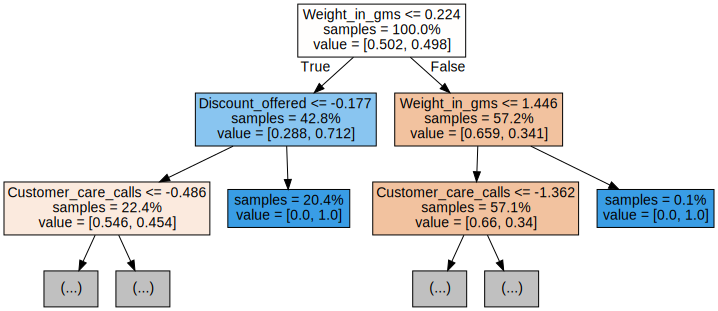

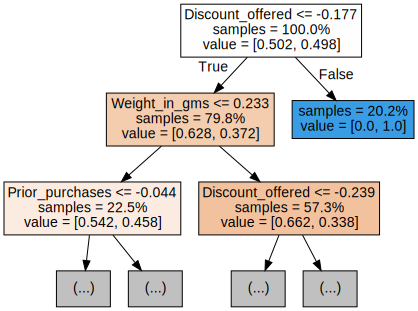

In [ ]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=df_normalized.columns[:-1],
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

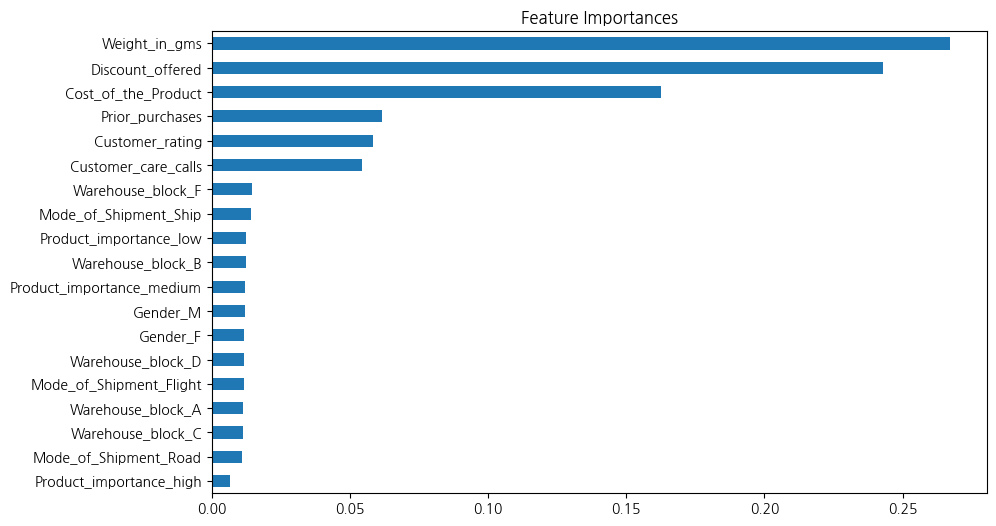

In [ ]:
feature_importances = pd.Series(best_rf.feature_importances_, index=data_enc.columns[:-1]).sort_values(ascending=False)

feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()

In [ ]:
data_enc.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C',
       'Warehouse_block_D', 'Warehouse_block_F', 'Gender_F', 'Gender_M',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium', 'Mode_of_Shipment_Flight',
       'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship',
       'Reached.on.Time_Y.N'],
      dtype='object')

### Boosting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight


class_weights = class_weight.compute_sample_weight('balanced', y_train_resampled)

gbc_model = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    subsample=1.0,
    random_state=42
)

gbc_model.fit(X_train_resampled, y_train_resampled, sample_weight=class_weights)


y_train_pred_gbc = gbc_model.predict(X_train_resampled)
y_test_pred_gbc = gbc_model.predict(X_test)

# Calculate the accuracy of the model on the training and testing sets
train_acc = accuracy_score(y_train_resampled, y_train_pred_gbc)
test_acc = accuracy_score(y_test, y_test_pred_gbc)

# Print the accuracy scores
print('Train accuracy: ', train_acc)
print('Test accuracy: ', test_acc)

Train accuracy:  0.7354507417268924
Test accuracy:  0.6931818181818182


Accuracy : 0.6931818181818182
ROC AUC  : 0.7405303030303031


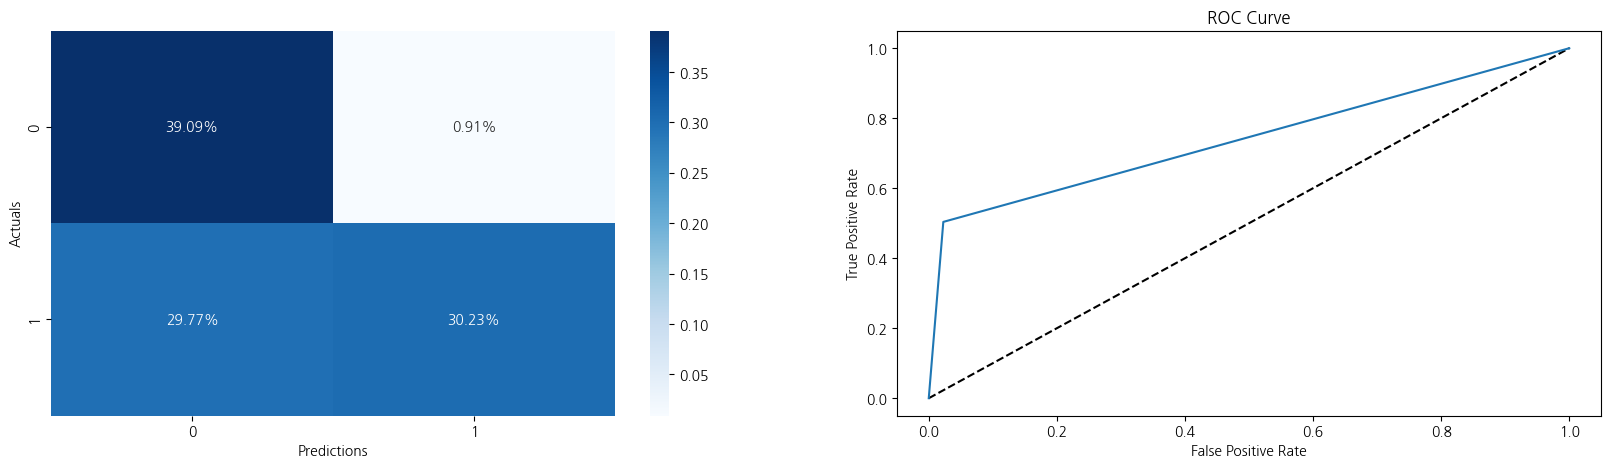

Accuracy: 0.6931818181818182
Precision: 0.9708029197080292
Recall: 0.5037878787878788
F1-score: 0.6633416458852868


In [ ]:
evaluate(y_test, y_test_pred_gbc)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.01,
    algorithm='SAMME.R',
    random_state=42
)

abc.fit(X_train_resampled, y_train_resampled, sample_weight=class_weights)

y_train_pred = abc.predict(X_train_resampled)
y_test_pred = abc.predict(X_test)

# Calculate the accuracy of the model on the training and testing sets
train_acc = accuracy_score(y_train_resampled, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print('Train accuracy: ', train_acc)
print('Test accuracy: ', test_acc)

Train accuracy:  0.701407379231647
Test accuracy:  0.6454545454545455


Accuracy : 0.6454545454545455
ROC AUC  : 0.7045454545454546


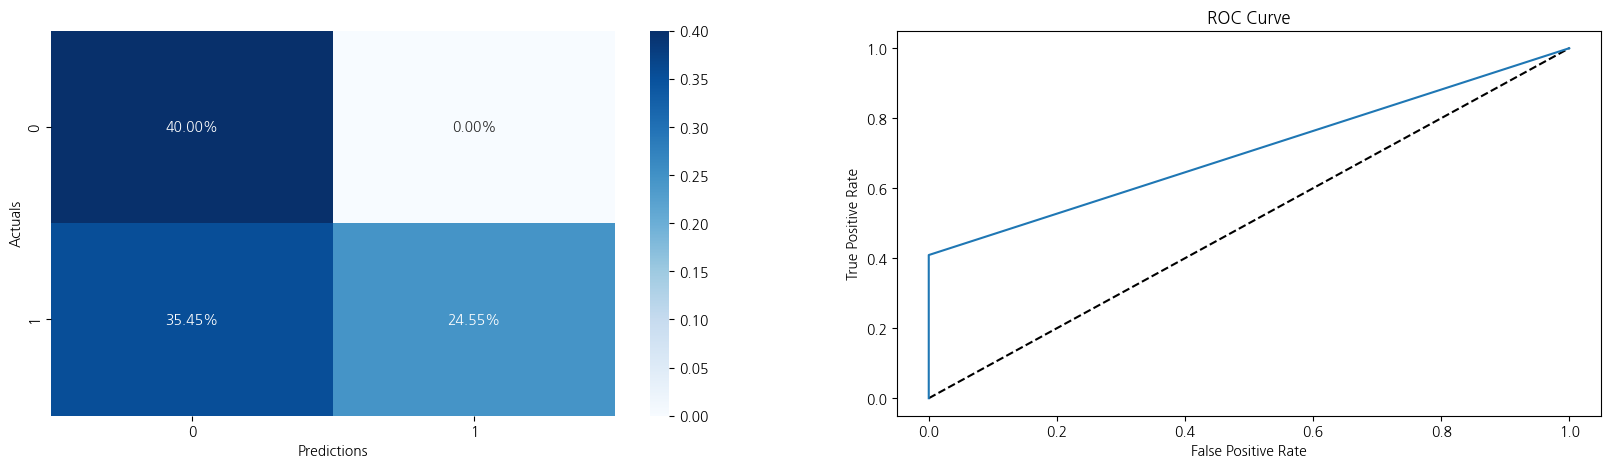

Accuracy: 0.6454545454545455
Precision: 1.0
Recall: 0.4090909090909091
F1-score: 0.5806451612903226


In [ ]:
evaluate(y_test, y_test_pred)

In [ ]:
'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product','Prior_purchases', 'Discount_offered', 'Weight_in_gms'